Kaggle: https://www.kaggle.com/jiangzuo/hr-comma-sep

Tutorial 1: https://www.kaggle.com/jiuzhang/ai-camp-logistic-regression-optimization

Tutorial 2: https://www.kaggle.com/jiuzhang/ai-camp-logistic-regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
TRAIN_DIR = './input/HR_comma_sep.csv'

# Explantory Data Analyisis

In [3]:
def plot_barchart_for_y_by_categorical_column(dataset, y_col, x_col):
    assert len(dataset[x_col].unique()) <= 4, \
        "Input x_col should be categorical column with unique values fewer than 5.'"
    
    result_dict = {}
    for x_col_val in dataset[x_col].unique():
        result_dict[x_col_val] = dataset[y_col][dataset[x_col] == x_col_val].value_counts()
        
    df = pd.DataFrame(result_dict)
    df.plot(kind='bar', stacked=True)
    plt.title(f"{y_col} by {x_col}")
    plt.xlabel(f"{y_col}") 
    plt.ylabel("Count")
    plt.show()

In [4]:
def plot_hist_for_numeric_column_by_y(dataset, y_col, x_col):
    assert sorted(list(dataset[y_col].unique())) == [0, 1], "Input y_col should be 0 or 1.'"
        
    dataset[x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution')
    plt.show() 

    dataset[dataset[y_col]==0][x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution, {y_col}=0')
    plt.show()

    dataset[dataset[y_col]==1][x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution, {y_col}=1')
    plt.show()

1.Take a Glance at the Data

In [5]:
train = pd.read_csv(TRAIN_DIR)

In [6]:
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
train.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
train.shape

(14999, 10)

2.Look at Categorical Columns

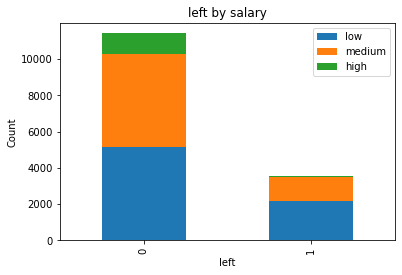

In [9]:
# Use Bar Chart
plot_barchart_for_y_by_categorical_column(train, y_col='left', x_col='salary')

In [10]:
# Use Cross Tab
ct = pd.crosstab(train['salary'], train['left'])
ct.div(ct.sum(axis=1), axis=0)

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


In [11]:
# Use Cross Tab
ct = pd.crosstab(train['salary'], train['left'])
ct.div(ct.sum(axis=1), axis=0)

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


Observation: Salary is a useful column. High salary means unlikely to resign.

3.Look at Numeric Columns

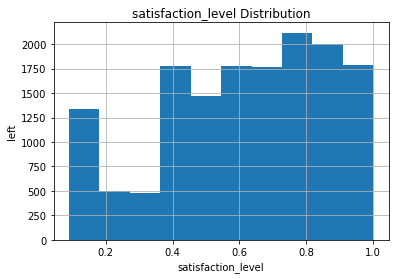

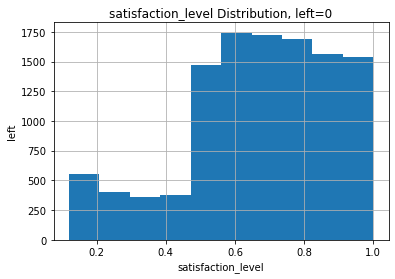

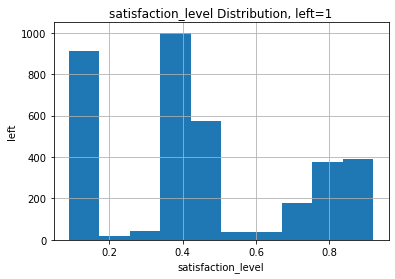

In [12]:
plot_hist_for_numeric_column_by_y(train, y_col='left', x_col='satisfaction_level')

Observation: Satisfaction level is a useful column. High satisfaction means unlikely to resign.

# Prepare Data

In [13]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split

In [14]:
def normalize_0_1(X):
    _, num_col = X.shape
    for i in range(1, num_col): # Don't normalize the first column (intercept).
        col_min, col_max = X[:, i].min(), X[:, i].max()
        X[:, i] = (X[:, i] - col_min) / (col_max - col_min)

1.Use DMATRICES to Create Training Set Easily (Use Dummy Variables for Categorical Variables)

In [15]:
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', train, return_type='dataframe')
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'})

In [16]:
X.head()

,Intercept,Department: Random,Department: Accounting,Department: HR,Department: Management,Department: Marketing,Department: Product_Management,Department: Sales,Department: Support,Department: Technical,Salary: Low,Salary: Medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


In [17]:
X_np = np.asmatrix(X)
y_np = np.ravel(y)

2.Normalize into 0~1

In [18]:
normalize_0_1(X_np)

3.Training Set, Cross Validation Set

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_np, y_np, test_size=0.2, random_state=0)
print(f'Training Set - X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'Validation Set - X val shape: {X_val.shape}, y val shape: {y_val.shape}')

Training Set - X train shape: (11999, 19), y train shape: (11999,)
Validation Set - X val shape: (3000, 19), y val shape: (3000,)


# Model 1: Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

1. Fit

In [22]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

0.7920660055004584

In [23]:
pd.DataFrame(list(zip(X.columns, np.transpose(log_reg.coef_))))

,0,1
0,Intercept,[-0.002018444581095508]
1,Department: Random,[-0.3266476352005852]
2,Department: Accounting,[0.2937802137012369]
3,Department: HR,[0.47577506825042143]
4,Department: Management,[-0.10308802402688902]
5,Department: Marketing,[0.20731278594563757]
6,Department: Product_Management,[0.14761362850181348]
7,Department: Sales,[0.22956481649883098]
8,Department: Support,[0.3572658933946647]
9,Department: Technical,[0.3444012094012734]


2. 10-fold Cross Validation to Verify

In [24]:
print(cross_val_score(LogisticRegression(max_iter=10000), X_np, y_np, scoring='accuracy', cv=10))

[0.80666667 0.79066667 0.794      0.78533333 0.804      0.80466667
 0.792      0.78933333 0.74466667 0.73782522]


3. Confusion Matrix of Prediction

In [25]:
y_pred = log_reg.predict(X_val)
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
print(classification_report(y_val, y_pred))

Accuracy:  0.7866666666666666
Confusion Matrix
[[2134  165]
 [ 475  226]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2299
         1.0       0.58      0.32      0.41       701

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



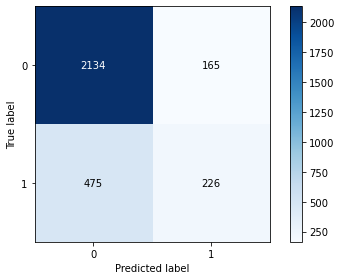

In [26]:
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes=range(2))

# Model 2: Logistic Regression (No Sklearn)

In [27]:
class LogisticRegression:
    """Logistic Regression with both GradientDescent and Newton's Method.
    Example usage:
        > log_reg = LogisticRegression()
        > log_reg.fit(x_train, y_train)
        > log_reg.predict(x_eval)
    """
    def __init__(self, learning_rate=0.1, max_iter=100, solver='GD', theta_0=None, verbose=True):
        """
        Args:
            learning_rate: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            solver: 'GD' - Gradient Descent | 'Newton' - Newton's Method
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss and accuracy values during training.
        """
        assert solver == 'GD' or solver == 'Newton', 'Unknown solver'
        
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.solver = solver          
        self.theta = theta_0
        self.verbose = verbose

    def fit(self, x_train, y_train, x_val, y_val):
        """Minimize loss(theta) for logistic regression.
        Args:
            x_train: Training example inputs. Shape (n_examples, dim).
            y_train: Training example labels. Shape (n_examples,).
        """
        _, num_features = x_train.shape
        self.theta = np.zeros(num_features) if self.theta is None else self.theta        
        for i in range(0, self.max_iter+1):
            if self.solver == 'GD':
                self.__update_theta_via_gradient_descent(x_train, y_train)
            else:
                self.__update_theta_via_newton_method(x_train, y_train)
            loss_train = self.__calculate_loss(x_train, y_train)  
            accuracy_train = self.__calculate_accuracy(x_train, y_train)               
            accuracy_val = self.__calculate_accuracy(x_val, y_val)                              
            if self.verbose and i%10 == 0:
                print(f'Iteration {i} : Loss {loss_train:.4f}  | ' + \
                      f'Train Accuarcy {accuracy_train:.4f} | '+\
                      f'Validation Accuarcy {accuracy_val:.4f}')
                        
    def predict(self, x):
        """Return predicted probabilities given new inputs x.
        Args:
            x: Inputs of shape (n_examples, dim).
        Returns:
            Output Shape (n_examples,).
        """
        pred = 1. / (1+np.exp(-x.dot(self.theta)))
        return self.__ravel_np_matrix(pred)
    
    def __update_theta_via_gradient_descent(self, x, y):
        """Update theta via gradient descent (only one step).
        Args:
            x: Inputs Shape (n_examples, dim).
            y: Inputs Shape (n_examples,).
        """
        num_examples, _ = x.shape     
        y_pred = self.predict(x)
        gradient = - (1/num_examples) * self.__ravel_np_matrix(x.T.dot(y - y_pred))
        self.theta -= self.learning_rate * gradient
        
    def __update_theta_via_newton_method(self, x, y):
        """Update theta via gradient descent (only one step).
        Args:
            x: Inputs Shape (n_examples, dim).
            y: Inputs Shape (n_examples,).
        """
        num_examples, _ = x.shape     
        y_pred = self.predict(x)
        gradient = - (1/num_examples) * x.T.dot(y - y_pred)
        hessian = (1/num_examples) * x.T.dot(np.diag(y_pred*(1-y_pred))).dot(x)
        self.theta -= self.learning_rate * \
                 self.__ravel_np_matrix(np.linalg.inv(hessian).dot(gradient.T))
        
    def __calculate_loss(self, x, y):
        """Calculate loss based on dataset (x, y).
        Args:
            x: Inputs Shape (n_examples, dim).
            y: Inputs Shape (n_examples,).
        Returns:
            Outputs Shape scalar.
        """
        num_examples, _ = x.shape
        y_pred = self.predict(x)
        y_pred_and_y = list(zip(y_pred, y))
        loss = - (1/num_examples) * \
               sum([np.log(y_pred) if y == 1 else np.log(1-y_pred) \
                    for y_pred, y in y_pred_and_y])
        return loss
    
    def __calculate_accuracy(self, x, y):
        """Calculate accuracy based on dataset (x, y).
        Args:
            x: Inputs Shape (n_examples, dim).
            y: Inputs Shape (n_examples,).
        Returns:
            Outputs Shape scalar.
        """
        num_examples, _ = x.shape  
        y_pred = self.predict(x)
        y_pred_and_y = list(zip(y_pred, y))
        accuracy = (1/num_examples) * \
                   sum([1 if (y_pred > 0.5 and y == 1) or (y_pred <= 0.5 and y == 0) else 0 \
                        for y_pred, y in y_pred_and_y])
        return accuracy
    
    def __ravel_np_matrix(self, np_matrix):
        """Ravel a np.matrix (1, n) into (n,).
        Args:
            np_matrix: Inputs Shape (1, n).
        Returns:
            Output Shape (n,).
        """
        return np.array(np_matrix).ravel()

1. Fit

In [28]:
log_reg = LogisticRegression(learning_rate=0.5, solver='GD', max_iter=200)
log_reg.fit(X_train, y_train, X_val, y_val)

Iteration 0 : Loss 0.6136  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 10 : Loss 0.5289  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 20 : Loss 0.5164  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 30 : Loss 0.5065  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 40 : Loss 0.4983  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 50 : Loss 0.4914  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 60 : Loss 0.4856  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7663
Iteration 70 : Loss 0.4805  | Train Accuarcy 0.7608 | Validation Accuarcy 0.7660
Iteration 80 : Loss 0.4761  | Train Accuarcy 0.7721 | Validation Accuarcy 0.7747
Iteration 90 : Loss 0.4722  | Train Accuarcy 0.7876 | Validation Accuarcy 0.7903
Iteration 100 : Loss 0.4688  | Train Accuarcy 0.7862 | Validation Accuarcy 0.7870
Iteration 110 : Loss 0.4658  | Train Accuarcy 0.7836 | Validation Accuarcy 0.7853
Iteration 120 : Loss 0.4632

Observation: For solver as gradient descent, 90 iterations is enough. Otherwise, there will be overfitting.

In [29]:
log_reg = LogisticRegression(learning_rate=0.5, solver='Newton', max_iter=30)
log_reg.fit(X_train, y_train, X_val, y_val)

Iteration 0 : Loss 0.5303  | Train Accuarcy 0.7771 | Validation Accuarcy 0.7773
Iteration 10 : Loss 0.4299  | Train Accuarcy 0.7924 | Validation Accuarcy 0.7883
Iteration 20 : Loss 0.4299  | Train Accuarcy 0.7924 | Validation Accuarcy 0.7883
Iteration 30 : Loss 0.4299  | Train Accuarcy 0.7924 | Validation Accuarcy 0.7883


Observation: Newton method converges within fewer iterations. But each iteration takes longer (due to the calculation of Heissan matrix).

2. Confusion Matrix of Prediction

In [30]:
y_pred = log_reg.predict(X_val)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
print(classification_report(y_val, y_pred))

Accuracy:  0.7883333333333333
Confusion Matrix
[[2133  166]
 [ 469  232]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2299
         1.0       0.58      0.33      0.42       701

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.77      3000



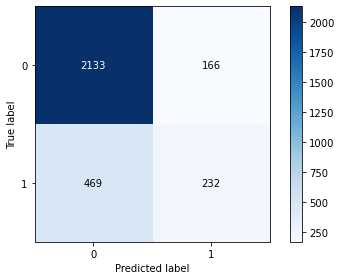

In [31]:
plot_confusion_matrix(confusion_matrix(y_val, y_pred),classes=range(2))